In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cooler
import lavaburst
import seaborn as sns
import matplotlib.pyplot as plt

/home/dmitry/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Example usage of some callers

In [2]:
import TADcalling
TADcalling.TADcalling_logger.setLevel('INFO')

In [3]:
from TADcalling import CallerClasses, DataClasses

In [4]:
IS = TADcalling.CallerClasses.InsulationCaller(['S2'], ['../data/S2.20000.cool'], 'cool', assembly='dm3', resolution=20000, balance=True, chr='chr2L')

In [5]:
IS.call({'window':np.arange(2e4,2e5,2e4), 'cutoff':[0.1, 0.2, 0.5, 0.7]})

/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice


/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice


/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice


/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice


/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice


/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice


/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice


/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice


In [7]:
IS._benchmark_df = pd.DataFrame(IS._benchmark_list)

In [9]:
IS._benchmark_df.append(IS._benchmark_df)

,ctime,memory,utime,walltime
0,0.000000,161276,0.093750,0.100856
1,0.015625,161276,0.093750,0.097311
2,0.015625,161276,0.109375,0.115348
3,0.031250,161276,0.093750,0.090893
4,0.000000,161276,0.109375,0.112348
5,0.000000,161276,0.109375,0.112027
6,0.015625,161276,0.140625,0.150030
7,0.015625,161276,0.109375,0.106356
8,0.000000,161276,0.109375,0.112529
9,0.015625,161276,0.109375,0.122090


In [6]:
IS._segmentations

{'S2': {(20000.0, 0.1): 87	91	1,
  (20000.0, 0.2): 87	91	1,
  (20000.0, 0.5): 0.0	0.0	0.0,
  (20000.0, 0.7): 0.0	0.0	0.0,
  (40000.0, 0.1): 0.0	0.0	0.0,
  (40000.0, 0.2): 0.0	0.0	0.0,
  (40000.0, 0.5): 0.0	0.0	0.0,
  (40000.0, 0.7): 0.0	0.0	0.0,
  (60000.0, 0.1): 0.0	0.0	0.0,
  (60000.0, 0.2): 0.0	0.0	0.0,
  (60000.0, 0.5): 0.0	0.0	0.0,
  (60000.0, 0.7): 0.0	0.0	0.0,
  (80000.0, 0.1): 0.0	0.0	0.0,
  (80000.0, 0.2): 0.0	0.0	0.0,
  (80000.0, 0.5): 0.0	0.0	0.0,
  (80000.0, 0.7): 0.0	0.0	0.0,
  (100000.0, 0.1): 0.0	0.0	0.0,
  (100000.0, 0.2): 0.0	0.0	0.0,
  (100000.0, 0.5): 0.0	0.0	0.0,
  (100000.0, 0.7): 0.0	0.0	0.0,
  (120000.0, 0.1): 0.0	0.0	0.0,
  (120000.0, 0.2): 0.0	0.0	0.0,
  (120000.0, 0.5): 0.0	0.0	0.0,
  (120000.0, 0.7): 0.0	0.0	0.0,
  (140000.0, 0.1): 0.0	0.0	0.0,
  (140000.0, 0.2): 0.0	0.0	0.0,
  (140000.0, 0.5): 0.0	0.0	0.0,
  (140000.0, 0.7): 0.0	0.0	0.0,
  (160000.0, 0.1): 0.0	0.0	0.0,
  (160000.0, 0.2): 0.0	0.0	0.0,
  (160000.0, 0.5): 0.0	0.0	0.0,
  (160000.0, 0.7): 0.0	0.0

In [6]:
DI = TADcalling.CallerClasses.DirectionalityCaller(['S2'], ['../data/S2.20000.cool'], 'cool', assembly='dm3', resolution=20000, balance=True, chr='chr2L')

In [7]:
DI.call({'window':np.arange(2e4,2e5,2e4), 'cutoff':[0.1, 0.2, 0.5, 0.7]})

In [7]:
lc = TADcalling.CallerClasses.LavaburstCaller(['S2'], ['../data/S2.20000.cool'], 'cool', assembly='dm3', resolution=20000, balance=True, chr='chr2L')

In [8]:
lc.call({'gamma':np.arange(-5,5.1,0.1), 'method':['armatus', 'modularity']})

INFO:TADcalling:NaNs filling with 0.00
INFO:TADcalling:Removing 1 first diagonals
INFO:TADcalling:Percentile filtering of input mtx, min percentile: 1.000000 (0.000), max percentile: 99.000000 (0.025)
INFO:TADcalling:Log-transform of input mtx, base: 2
INFO:TADcalling:Subtracting minimum from mtx


In [9]:
lc._segmentations

{'S2': {(-5.0, 'armatus'): 0	677	1
  677	682	1
  682	1151	1, (-5.0, 'modularity'): 0	1151	1, (-4.9, 'armatus'): 0	676	1
  676	687	1
  687	1151	1, (-4.9, 'modularity'): 0	1151	1, (-4.800000000000001,
   'armatus'): 0	674	1
  674	691	1
  691	1151	1, (-4.800000000000001,
   'modularity'): 0	1151	1, (-4.700000000000001, 'armatus'): 0	673	1
  673	696	1
  696	1151	1, (-4.700000000000001,
   'modularity'): 0	1151	1, (-4.600000000000001, 'armatus'): 0	671	1
  671	701	1
  701	1151	1, (-4.600000000000001,
   'modularity'): 0	1151	1, (-4.500000000000002, 'armatus'): 0	670	1
  670	705	1
  705	1151	1, (-4.500000000000002,
   'modularity'): 0	1151	1, (-4.400000000000002, 'armatus'): 0	669	1
  669	710	1
  710	1151	1, (-4.400000000000002,
   'modularity'): 0	1151	1, (-4.3000000000000025, 'armatus'): 0	668	1
  668	714	1
  714	1151	1, (-4.3000000000000025,
   'modularity'): 0	1151	1, (-4.200000000000003, 'armatus'): 0	666	1
  666	714	1
  714	719	1
  719	1151	1, (-4.200000000000003,
   'modularity'): 0	1

In [11]:
la = TADcalling.CallerClasses.LavaArmatusCaller(['S2'], ['../data/S2.20000.cool'], 'cool', assembly='dm3', resolution=20000, balance=True, chr='chr2L')

In [8]:
la.call({'gamma':np.arange(-5,5.1,0.1)})

In [9]:
la._segmentations

{'S2': {-5.0: 0	677	1
  677	682	1
  682	1151	1, -4.9: 0	676	1
  676	687	1
  687	1151	1, -4.800000000000001: 0	674	1
  674	691	1
  691	1151	1, -4.700000000000001: 0	673	1
  673	696	1
  696	1151	1, -4.600000000000001: 0	671	1
  671	701	1
  701	1151	1, -4.500000000000002: 0	670	1
  670	705	1
  705	1151	1, -4.400000000000002: 0	669	1
  669	710	1
  710	1151	1, -4.3000000000000025: 0	668	1
  668	714	1
  714	1151	1, -4.200000000000003: 0	666	1
  666	714	1
  714	719	1
  719	1151	1, -4.100000000000003: 0	663	1
  664	714	1
  714	724	1
  724	1151	1, -4.0000000000000036: 0	664	1
  664	714	1
  714	728	1
  728	1151	1, -3.900000000000004: 0	660	1
  664	714	1
  714	733	1
  733	1151	1, -3.8000000000000043: 0	659	1
  659	663	1
  664	714	1
  714	737	1
  737	1151	1, -3.7000000000000046: 0	4	1
  4	663	1
  664	714	1
  714	742	1
  742	1151	1, -3.600000000000005: 0	5	1
  5	663	1
  664	714	1
  714	747	1
  747	1151	1, -3.5000000000000053: 0	6	1
  6	663	1
  664	713	1
  713	752	1
  752	1151	1, -3.4000000000000057

In [7]:
acpp = TADcalling.CallerClasses.ArmatusCaller(['S2'], ['../data/S2.20000.cool'], 'cool', assembly='dm3', resolution=20000, balance=True, chr='chr2L')

In [8]:
acpp.call({'gamma':[i / 10 for i in range(-10, 11)]}, caller_path='armatus')

INFO:TADcalling:Converting file: ../data/S2.20000.cool from cool to txt.gz
INFO:TADcalling:gzip ../data/S2.20000.chr2L.txt
INFO:TADcalling:Check stdout: b''
INFO:TADcalling:Stderr is not empty. Might be an error in call_and_check_errors for the command: gzip ../data/S2.20000.chr2L.txt
INFO:TADcalling:Check stderr: b'gzip: ../data/S2.20000.chr2L.txt.gz already exists;\tnot overwritten\n'
INFO:TADcalling:Command completed: 0.557170
INFO:TADcalling:armatus -i ../data/S2.20000.chr2L.txt.gz -g -1.0 -j -o buff -r 1
INFO:TADcalling:Check stdout: b'OPTIMAL SCORE: 107645\n'
INFO:TADcalling:Stderr is not empty. Might be an error in call_and_check_errors for the command: armatus -i ../data/S2.20000.chr2L.txt.gz -g -1.0 -j -o buff -r 1
INFO:TADcalling:Check stderr: b'Reading input from ../data/S2.20000.chr2L.txt.gz.\nN/A at resolution 1bp\nline 1000\nMatrixParser read matrix of size: 1151 x 1151\ngamma=-1\nbegin computeTopK()\nIn topK()\nThe 0th-best solution had score 107645\nDomain ensemble size

INFO:TADcalling:Command completed: 1.377929
INFO:TADcalling:armatus -i ../data/S2.20000.chr2L.txt.gz -g 0.2 -j -o buff -r 1
INFO:TADcalling:Check stdout: b'OPTIMAL SCORE: 408.906\n'
INFO:TADcalling:Stderr is not empty. Might be an error in call_and_check_errors for the command: armatus -i ../data/S2.20000.chr2L.txt.gz -g 0.2 -j -o buff -r 1
INFO:TADcalling:Check stderr: b'Reading input from ../data/S2.20000.chr2L.txt.gz.\nN/A at resolution 1bp\nline 1000\nMatrixParser read matrix of size: 1151 x 1151\ngamma=0.2\nbegin computeTopK()\nIn topK()\nThe 0th-best solution had score 408.906\nDomain ensemble size: 1\nWriting consensus domains to: buff.consensus.txt\n'
INFO:TADcalling:Command completed: 1.409668
INFO:TADcalling:armatus -i ../data/S2.20000.chr2L.txt.gz -g 0.3 -j -o buff -r 1
INFO:TADcalling:Check stdout: b'OPTIMAL SCORE: 380.409\n'
INFO:TADcalling:Stderr is not empty. Might be an error in call_and_check_errors for the command: armatus -i ../data/S2.20000.chr2L.txt.gz -g 0.3 -j -o

In [9]:
acpp._segmentations

{'S2': {-1.0: 0	727	1
  755	760	1
  772	776	1
  816	836	1
  873	877	1
  906	1050	1
  1116	1137	1, -0.9: 0	727	1
  755	760	1
  772	776	1
  816	836	1
  906	1050	1
  1116	1137	1, -0.8: 0	727	1
  755	760	1
  772	776	1
  816	836	1
  906	1050	1
  1116	1137	1, -0.7: 0	727	1
  772	776	1
  816	836	1
  906	1050	1
  1116	1137	1, -0.6: 5	14	1
  26	727	1
  816	833	1
  906	1050	1
  1116	1137	1, -0.5: 5	14	1
  26	727	1
  816	833	1
  906	1050	1
  1116	1137	1, -0.4: 6	14	1
  26	716	1
  816	833	1
  906	1050	1
  1116	1137	1, -0.3: 6	14	1
  26	400	1
  483	489	1
  536	542	1
  598	645	1
  658	662	1
  682	716	1
  816	833	1
  900	907	1
  937	941	1
  968	1050	1
  1116	1127	1, -0.2: 6	14	1
  26	349	1
  483	489	1
  536	542	1
  598	645	1
  658	662	1
  682	707	1
  816	821	1
  831	836	1
  900	907	1
  937	941	1
  968	978	1
  994	1007	1
  1014	1021	1
  1033	1038	1
  1116	1127	1, -0.1: 26	224	1
  248	253	1
  483	489	1
  536	542	1
  598	604	1
  623	627	1
  682	686	1
  690	694	1
  816	821	1
  902	907	1
  968	977	1
  103

In [7]:
df_acpp = acpp.segmentation2df()

gamma -0.9
gamma -0.8
gamma 0.0
gamma -0.1
gamma -0.6
gamma -0.2
gamma -1.0
gamma -0.7
gamma -0.3
gamma -0.4
gamma -0.5


In [8]:
df_lc = lc.segmentation2df()

gamma -3.300000000000006
method modularity
gamma -2.500000000000009
method modularity
gamma 5.199999999999964
method modularity
gamma -2.3000000000000096
method armatus
gamma -0.3000000000000167
method armatus
gamma -1.4000000000000128
method armatus
gamma -1.0000000000000142
method modularity
gamma -4.9
method modularity
gamma 3.699999999999969
method modularity
gamma -0.10000000000001741
method modularity
gamma -1.4000000000000128
method modularity
gamma 1.499999999999977
method armatus
gamma 0.09999999999998188
method modularity
gamma -2.1000000000000103
method modularity
gamma -0.7000000000000153
method modularity
gamma -3.1000000000000068
method modularity
gamma 2.4999999999999734
method modularity
gamma 3.39999999999997
method modularity
gamma 1.9999999999999751
method modularity
gamma 0.49999999999998046
method modularity
gamma -0.3000000000000167
method modularity
gamma -4.700000000000001
method armatus
gamma 1.0999999999999783
method modularity
gamma 1.8999999999999755
method 

In [27]:
df_acpp.head()

,bgn,caller,end,gamma,label
0,0,Armatus,727,-0.9,S2
1,755,Armatus,760,-0.9,S2
2,772,Armatus,776,-0.9,S2
3,816,Armatus,836,-0.9,S2
4,906,Armatus,1050,-0.9,S2


In [22]:
armatus_mask = df_lc.loc[:, 'method'] == 'armatus'

In [26]:
df = pd.concat([df_lc[armatus_mask], df_acpp])

In [38]:
df.head()

,bgn,caller,end,gamma,label,method,length
0,0,Lavaburst,17,-2.3,S2,armatus,17
1,18,Lavaburst,660,-2.3,S2,armatus,642
2,664,Lavaburst,711,-2.3,S2,armatus,47
3,711,Lavaburst,820,-2.3,S2,armatus,109
4,820,Lavaburst,1151,-2.3,S2,armatus,331


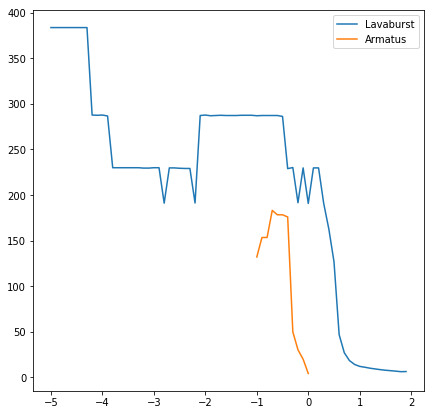

In [37]:
df.loc[:,'length'] = df.end-df.bgn
gr = df.groupby(['gamma', 'caller']).mean().reset_index().sort_values(['caller', 'gamma'])
plt.figure(figsize=[7,7])
for caller in ['Lavaburst', 'Armatus']:
    tmp = gr.query('caller=="{}"'.format(caller))
    plt.plot( tmp.gamma, tmp.length, label=caller)
    
plt.legend()

In [12]:
df_lc = lc.segmentation2df()
df_is = IS.segmentation2df()
df_di = DI.segmentation2df()

df = pd.concat([x.segmentation2df() for x in [lc, IS, DI]])

In [10]:
df[0:5]

,bgn,caller,end,gamma,label,method
0,0,Lavaburst,1151,-3.3,S2,modularity
0,0,Lavaburst,1151,-2.5,S2,modularity
0,0,Lavaburst,15,5.2,S2,modularity
1,21,Lavaburst,28,5.2,S2,modularity
2,28,Lavaburst,43,5.2,S2,modularity


In [25]:
df.loc[:,'length'] = df.end-df.bgn

DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/usr/local/lib/python3.5/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


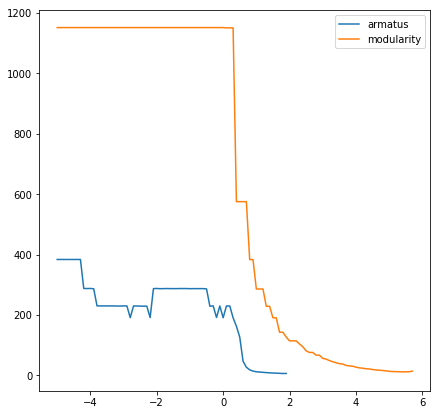

In [12]:
gr = df.query('caller=="Lavaburst"').groupby(['gamma', 'method']).mean().reset_index().sort_values(['method', 'gamma'])
plt.figure(figsize=[7,7])
for method in ['armatus', 'modularity']:
    tmp = gr.query('method=="{}"'.format(method))
    plt.plot( tmp.gamma, tmp.length, label=method )
    
plt.legend()

In [21]:
hc = TADcalling.CallerClasses.HiCsegCaller(['S2'], ['../data/S2.20000.cool'], 'cool', assembly='dm3', resolution=20000, balance=True, chr='chr2L')

In [22]:
hc.call(params_dict={'distr_model':["P"]}, tune=True)

INFO:TADcalling:Converting file: ../data/S2.20000.cool from cool to txt
INFO:TADcalling:Rscript hicseg_script.R
INFO:TADcalling:Check stdout: b''


In [23]:
df_hc = hc.segmentation2df()

In [6]:
lc.convert_files("txt.gz")

In [18]:
lc._metadata

{'assembly': 'dm3',
 'balance': False,
 'chr': 'chr2L',
 'data_formats': ['cool', 'txt.gz', 'txt.gz'],
 'files_cool': ['./data/S2.20000.cool'],
 'files_txt.gz': ['./data/S2.20000.chr2L.txt.gz'],
 'labels': ['S2'],
 'resolution': 1000,
 'size': 0}

### DEVELOPMENT OF MrTADFinder

In [3]:
mrc = TADcalling.CallerClasses.MrTADFinderCaller(['S2'], ['../data/S2.20000.cool'], 'cool', assembly='dm3', resolution=20000, balance=True, chr='chr2L')

In [5]:
mrc._metadata

{'assembly': 'dm3',
 'balance': True,
 'chr': 'chr2L',
 'data_formats': ['cool', 'mr_sparse'],
 'files_cool': ['../data/S2.20000.cool'],
 'files_mr_sparse': ['../data/S2.20000.chr2L.sparse.txt'],
 'labels': ['S2'],
 'method': 'Base',
 'params': ['params'],
 'resolution': 20000,
 'size': 0}

In [4]:
mrc.call(1, caller_path='../../MrTADFinder/run_MrTADFinder.jl')

INFO:TADcalling:Converting file: ../data/S2.20000.cool from cool to mr_sparse
INFO:TADcalling:julia ../../MrTADFinder/run_MrTADFinder.jl ../data/S2.20000.chr2L.mr_sparse.txt ../data/S2.20000.chr2L.genome_bin.txt ../data/S2.20000.chr2L.all_bins.txt res=20000 1 buff_mrtadfinder.txt
INFO:TADcalling:Check stdout: b'reading binning information\nreading contact map\nestimating the null model\n398.3238427492396\n229.27585114370873\n142.36827101337013\n88.71300427935282\n58.39096542067618\n38.57713413983011\n26.35065661061504\n18.07528065734837\n12.62906744004556\n8.79511025237405\n6.1510435625324416\n4.295955370547412\n3.0066273050968713\n2.1030581237775223\n1.472783214460475\n1.0314987152252546\n0.7229065817728486\n0.5066416804314664\n0.35517350369225326\n0.24899976863201537\n0.17459562212552057\n0.12243065205879244\n0.0858608573350988\n0.06021696197657942\n0.04223382614474887\n0.029621239714066744\n0.020775651860515408\n0.014574744628451989\n0.01022547391153968\n0.007174496798614624\n0.0050

FileNotFoundError: File b'buff_mrtadfinder.txt' does not exist

In [3]:
c = cooler.Cooler('./data/S2.20000.cool')

In [4]:
sparse = c.matrix(balance=True, as_pixels=True).fetch('chr2L')

In [5]:
sparse.loc[:, "bin1_id":"bin2_id"] += 1

In [6]:
sparse

,bin1_id,bin2_id,count,balanced
0,1,1,2859,0.892852
1,1,2,382,0.117808
2,1,3,315,0.076218
3,1,4,251,0.051895
4,1,5,109,0.026401
5,1,6,61,0.018097
6,1,7,53,0.019344
7,1,8,39,0.013315
8,1,9,16,0.005216
9,1,10,34,0.009732


In [7]:
sparse.loc[:, 'bin1_id':'count'].to_csv('test_sparse.txt', header=False, index=False, sep='\t')

In [61]:
max_bin = sparse.loc[:, 'bin1_id':'bin2_id'].max().max()

In [77]:
with open("genome_bin.txt", 'w') as outfile:
    outfile.write("1\tchr1\t0\t{}".format(max_bin - 1))

In [79]:
max_bin

1151

In [80]:
with open('chr_bin.txt', 'w') as outfile:
    for i in range(max_bin):
        outfile.write("0\t{}\t{}\n".format(i * 20000 + 1, (i + 1) * 20000))

In [12]:
subprocess.run("julia ../MrTADFinder/run_MrTADFinder.jl test_sparse.txt genome_bin.txt chr_bin.txt res=20000 1 test_mrtadfinder.txt", shell=True)

CompletedProcess(args='julia ../MrTADFinder/run_MrTADFinder.jl test_sparse.txt genome_bin.txt chr_bin.txt res=20000 1 test_mrtadfinder.txt', returncode=1)

In [13]:
mr_df = pd.read_csv('test_mrtadfinder.csv')

In [17]:
mr_df.loc[:, "domain_st_bin":"domain_ed_bin"].values

array([[42015, 42018],
       [42019, 42035],
       [42036, 42041],
       [42042, 42042],
       [42043, 42043],
       [42044, 42044],
       [42045, 42045],
       [42046, 42046],
       [42047, 42047]])

### Format conversions test


In [15]:
import TADcalling
IS = TADcalling.CallerClasses.InsulationCaller(['S2'], ['../data/S2.20000.cool'], 'cool', assembly='dm3', resolution=20000, balance=True, chr='chr2L')

In [ ]:
IS.convert_files('hic', juicer_path='../juicer_tools.1.8.9_jcuda.0.8.jar', remove_intermediary_files=False)

In [ ]:
IS.convert_files('h5')

### Development of Experiment class

In [33]:
from itertools import product, chain
from copy import deepcopy
from collections import Iterable


caller_dict = {'armatus': CallerClasses.ArmatusCaller,
               'lavaburst': CallerClasses.LavaburstCaller,
               'lavaarmatus': CallerClasses.LavaArmatusCaller,
               'lavamodularity': CallerClasses.LavaModularityCaller,
               'lavavariance': CallerClasses.LavaVarianceCaller,
               'lavacorner': CallerClasses.LavaCornerCaller,
               'insulation': CallerClasses.InsulationCaller,
               'directionality': CallerClasses.DirectionalityCaller,
               'hicseg': CallerClasses.HiCsegCaller,
               'mrtadfinder': CallerClasses.MrTADFinderCaller,
               'hicexplorer': CallerClasses.HiCExplorerCaller}

default_funcs = {'simulated': ['TPR TADs', 'TPR boundaries', 'PPV TADs', 'PPV boundaries'],
                 'convergence': ['JI TADs', 'OC TADs', 'JI boundaries', 'OC boundaries'],
                 'border_events': ['P-value']}



class Experiment(object):

    def __init__(self, datasets_labels, datasets_files, data_format, callername, track_file=None, **kwargs):

        mode = kwargs.get('mode', 'iterative')
        background_method = kwargs.get('background_method', 'size')
        optimisation = kwargs.get('optimisation', 'convergence')

        if mode not in ('iterative', 'user'):
            raise Exception("Mode not understood: %s" % mode)
        else:
            self.mode = mode

        if background_method not in ('size', 'dispersion'):
            raise Exception("Background method not understood: %s" % background_method)
        else:
            self.background_method = background_method

        if optimisation not in ('convergence', 'simulated', 'border_events'):
            raise Exception("optimisation method not understood: %s" % optimisation)
        else:
            self.optimisation = optimisation

        if callername not in caller_dict.keys():
            raise Exception("Caller not understood: %s" % caller)
        else:
            self.caller = caller_dict[callername](datasets_labels, datasets_files, data_format, **kwargs)
            self.callername = callername

        if track_file:
            self.track = DataClasses.load_BED(track_file)[self.caller._metadata['chr']]
        else:
            self.track = None
        
        self.default_ranges = {'armatus': pd.Series([np.arange(-5, 5.5, 0.5)], index=['gamma']),
                               'lavaburst': pd.Series([np.arange(-5, 5.5, 0.5)], index=['gamma']),
                               'lavaarmatus': pd.Series([np.arange(-5, 5.5, 0.5)], index=['gamma']),
                               'lavavariance': pd.Series([np.arange(-5, 5.5, 0.5)], index=['gamma']),
                               'lavacorner': pd.Series([np.arange(-5, 5.5, 0.5)], index=['gamma']),
                               'lavamodularity': pd.Series([np.arange(-5, 5.5, 0.5)], index=['gamma']),
                               'insulation': pd.Series([np.arange(1,11,1) * self.caller._metadata['resolution'],
                                                        [0.1, 0.2, 0.5, 0.7]], index=['window', 'cutoff']),
                               'directionality': pd.Series([np.arange(1,11,1) * self.caller._metadata['resolution'],
                                                            [0.1, 0.2, 0.5, 0.7]], index=['window', 'cutoff']),
                               'hicseg': None,
                               'mrtadfinder': None,
                               'hicexplorer': None}


        self.history = {'ranges': [deepcopy(self.default_ranges[self.callername])],
                        'best_gamma': list(),
                        'best_func': list(),
                        'iteration': 0} # dictionary for history events
        self.optimisation_data = pd.DataFrame() # handles TPR, PPV, JI, OC...
        self.back_data = pd.DataFrame() # handles mean size or dispersions

        # min and max mean size of TADs in bins, user is able to redefine them.
        self.profile = {'size': [2, 100],
                        'dispersion': [0.05, 0.95]}
        
    
    @staticmethod
    def data_generation(caller, obtained_gamma_range, mode):
        if not obtained_gamma_range is None:
            if obtained_gamma_range.shape[0] == 1:
                gamma_range = list(deepcopy(obtained_gamma_range[0]))
                arr_shape = len(gamma_range)
            else:
                gamma_range = list(product(*obtained_gamma_range))
                arr_shape = [len(dim) for dim in obtained_gamma_range]

            if mode in ('simulated', 'border_events'):
                label = caller._metadata['labels'][0]
                segmentations = [caller._segmentations[label][gamma] for gamma in gamma_range]
                return [segmentations], arr_shape, gamma_range
            
            elif mode == 'convergence':
                label_rep1 = list(filter(lambda i: "rep1" in i, caller._metadata['labels']))[0]
                label_rep2 = list(filter(lambda i: "rep2" in i, caller._metadata['labels']))[0]
                segmentations_rep1 = [caller._segmentations[label_rep1][gamma] for gamma in gamma_range]
                segmentations_rep2 = [caller._segmentations[label_rep2][gamma] for gamma in gamma_range]
                return [segmentations_rep1, segmentations_rep2], arr_shape, gamma_range
            
            elif mode == 'sizes':
                segmentation_sizes = [[caller._segmentations[label][gamma].data[:, 1] - caller._segmentations[label][gamma].data[:, 0] 
                                       for gamma in gamma_range]
                                      for label in caller._metadata['labels']]
                return segmentation_sizes, arr_shape, gamma_range

            else:
                raise Exception("Mode for data generation not understood: %s" % mode)

        else:
            gamma_range = None
            arr_shape = 1
            
            if mode in ('simulated', 'border_events'):
                label = caller._metadata['labels'][0]
                segmentations = [caller._segmentations[label]]
                return segmentations, arr_shape, gamma_range
            
            elif mode == 'convergence':
                label_rep1 = list(filter(lambda i: "rep1" in i, caller._metadata['labels']))[0]
                label_rep2 = list(filter(lambda i: "rep2" in i, caller._metadata['labels']))[0]
                segmentations_rep1 = [caller._segmentations[label_rep1]]
                segmentations_rep2 = [caller._segmentations[label_rep2]]
                return segmentations_rep1, segmentations_rep2, arr_shape, gamma_range
            
            elif mode == 'sizes':
                segmentation_sizes = [[caller._segmentations[label].data[:, 1] - self.caller._segmentations[label].data[:, 0]]
                                      for label in caller._metadata['labels']]
                return segmentation_sizes, arr_shape, gamma_range

            else:
                raise Exception("Mode for data generation not understood: %s" % mode)

        
    
    @staticmethod
    def back_calc(segmentation_sizes, arr_shape, background_method='size'):
        """
        Calculates background function: mean size of TADs or
        dispersion of sizes for each segmentation.
        :param caller: a CallerClasses class with generated segmentations
        :param obtained_gamma_range: a pd.Series with range of parameter
        :param background_method: a background function to be calculated
        """        
        if background_method == 'size':
            return np.array([np.reshape([np.mean(i) for i in labelled], arr_shape) for labelled in segmentation_sizes])
        elif background_method == 'dispersion':
            return np.array([np.reshape([np.std(i) for i in labelled], arr_shape) for labelled in segmentation_sizes])
        else:
            raise Exception("Background method not understood: %s" % background_method)
    
    @staticmethod
    def optimised_calc(segmentation_list, arr_shape, optimisation, **kwargs):
        """
        Calculates function to be optimised: TPRs and FDRs for
        simulated segmentations, convergence between two replica
        or p-values of distances to the closest genome features based
        on track file.
        :param caller: a CallerClasses class instance with generated segmentations
        :param obtained_gamma_range: a pd.Series with range of parameter
        :param optimisation: an optimisation mode to be calculated
        :param track: a GenomicRanges instance of some genomic track to be used
        """
        track = kwargs.get('track', None)

        if optimisation == 'simulated':
            return list(map(np.array, (np.reshape([segmentation.count_coef(track, coef=function) 
                                        for segmentation in segmentation_list[0]], arr_shape) 
                                       for function in ('TPR TADs', 'PPV TADs', 'TPR boundaries', 'PPV boundaries'))))

        elif optimisation == 'convergence':
            return list(map(np.array, [np.reshape([segmentation_list[0][i].count_coef(segmentation_list[1][i], coef=function) 
                                        for i in range(len(segmentation_list[0]))], arr_shape)
                                       for function in ('JI TADs', 'OC TADs', 'JI boundaries', 'OC boundaries')]))

        elif optimisation == 'border_events':
            distances = [segmentation.dist_closest(track, mode='bin-boundariwise').flatten()
                         for segmentation in segmentation_list[0]]
            #return 1 - p-values
            return distances
        else:
            raise Exception("optimisation method not understood: %s" % optimisation)


    @staticmethod
    def max_coord(target_arr, back_arr, mask_list):
        """
        Find coordinates of maximum values in target_arr
        based on mask from back_arr values.
        """
        if target_arr.shape[0] != back_arr.shape[1]:
            raise Exception("Shapes of target and background arrays are inconsistent: {} vs {}".format(target_arr.shape, back_arr.shape))
        mask = (back_arr <= mask_list[0]) | (back_arr >= mask_list[1])
        if len(back_arr.shape) > 1 and back_arr.shape[0] > 1:
            mask = np.multiply(*mask)
        else:
            mask = mask[0]
        v1 = target_arr.copy()
        v1[mask] = -100
        v1_rev = v1.flatten()[::-1]
        v1_rev.shape = v1.shape
        coord = len(v1_rev.flatten()) - v1_rev.argmax() - 1
        return np.unravel_index(coord, v1.shape)
    
    
    @staticmethod
    def select_function(optimising_list):
        if len(optimising_list) == 1:
            return 0
        elif len(optimising_list) > 1:
            gradient_list = [np.gradient(func) for func in optimising_list]
            convoluted_list = [np.sum(np.abs(grad)) for grad in gradient_list]
            rank_arr = np.argsort(-np.array(convoluted_list))
            best_func = np.argmin(rank_arr)
            return best_func
        else:
            raise Exception("optimising list is of unexpected length: %d" % len(optimising_list))
    
    
    def make_newrange(self, oldrange, optimising_list, back_arr, background_method, **kwargs):
        """
        Return new range of gammas based on old range, values of optimised
        function, background function and background method.
        """
        mode = kwargs.get('mode', 'primary')
        if mode == 'gradient-selection':
            best_func = Experiment.select_function(optimising_list)
            target_arr = optimising_list[best_func]
        elif mode == 'sum-maximization':
            target_arr = sum(optimising_list)
            best_func = -1
        elif mode == 'primary':
            best_func = 0
            target_arr = optimising_list[0]
        else:
            raise Exception("Mode not understood: %s" % mode)

        if background_method == 'dispersion':
            # TODO: cannot guess how to assign percentiles of values to them in array
            raise Exception("Dispersion not implemented!")

        elif background_method == 'size':
            range_list = list()
            max_index = Experiment.max_coord(target_arr, back_arr, self.profile['size'])
            best_gamma = list()
            if not isinstance(max_index, list) and not isinstance(max_index, tuple):
                max_index = [max_index]
            for dim in range(oldrange.shape[0]):
                max_loc = max_index[dim]
                best_gamma.append(oldrange[dim][max_loc])
                old_step = oldrange[dim][1] - oldrange[dim][0]
                if 0.1 >= (max_loc / target_arr.shape[dim]):
                    left = oldrange[dim][0] - 5 * old_step
                    right = oldrange[dim][max_loc] + 2 * old_step
                    step = old_step

                elif (max_loc / target_arr.shape[dim]) >= 0.9:
                    left = oldrange[dim][max_loc] - 2 * old_step
                    right = oldrange[dim][-1] + 5 * old_step
                    step = old_step

                else:
                    left = oldrange[dim][max_loc] - 2 * old_step
                    right = oldrange[dim][max_loc] + 2 * old_step
                    step = old_step / 5

                range_list.append(np.arange(left, right + step, step).round(5).tolist())
            return pd.Series(data=[i for i in np.array(range_list)], index=oldrange.index), tuple(best_gamma), best_func

        else:
            raise Exception("Background method not understood: %s" % background_method)
            
    @staticmethod
    def chain_multiindex(arr1, arr2):
        """
        Takes 1-dim arr1 and n-dim arr2 and returns
        pd.Multiindex of product(arr1, arr2).
        In case n > 1, flattens items of 
        product(arr1, arr2).
        """
        prod = list(product(arr1, arr2))
        try:
            iter(prod[0][1])
            v2 = [[item[0]] + list(item[1]) for item in prod]
            names = ['label'] + ['gamma{}'.format(i + 1) for i in range(len(v2[0]) - 1)]
            return pd.MultiIndex.from_tuples(v2, names=names)
        except TypeError:
            return pd.MultiIndex.from_tuples(prod, names=['label', 'gamma1'])
    
    @staticmethod    
    def plot_tads(mtx, tads, bgn=0, end=250, fname=None, plot_size=None):
        """
        Plot given matrix and segmentaion in given bin coordinates.
        Optionally saves figure to file and redefine figure size.
        """
        tads_color = 'blue'
        
        # plot tuning
        if plot_size:
            plt.figure(figsize=plot_size)
        sns.heatmap(mtx[bgn:end, bgn:end], cmap='Reds')
        plt.xticks([])
        plt.yticks([])

        for i in tads:
            tad_bgn = i[0] - bgn
            tad_end = i[1] - bgn
            plt.plot([tad_bgn, tad_end], [tad_bgn, tad_bgn], color=tads_color)
            plt.plot([tad_end, tad_end], [tad_bgn, tad_end], color=tads_color)
        
        if fname:
            plt.savefig(fname)
    
    @staticmethod
    def add_data(data1, data2):
        """
        Adds data2 to data1 and return new DataFrame.
        In case of duplicate indices those of data2
        will be removed.
        """
        buff = data1.append(data2)
        return buff[~buff.index.duplicated(keep='first')]

    def call(self, **kwargs):
        """
        Perform one segmentation call in given range of gammas.
        Estimate new range of gammas, best gamma in current range.
        Plot optimisation and background data as well as the
        best current segmentation.
        """
        mode = kwargs.get('mode', 'primary')
        if self.history['ranges'][-1] is None:
            pass
        background_method = kwargs.get('background_method', self.background_method)

        self.caller.call(self.history['ranges'][-1])
        
        segmentation_sizes, arr_shape, gamma_arr = Experiment.data_generation(self.caller, self.history['ranges'][-1], 'sizes')

        back_arr= Experiment.back_calc(segmentation_sizes, arr_shape,
                                       background_method=background_method)
        
        segmentation_list, arr_shape, gamma_arr = Experiment.data_generation(self.caller, self.history['ranges'][-1], self.optimisation)
        optimising_list = Experiment.optimised_calc(segmentation_list, arr_shape,
                                                    self.optimisation, track=self.track)

        new_range, best_gamma, best_func_id = self.make_newrange(self.history['ranges'][-1], optimising_list,
                                                                 back_arr, self.background_method, mode=mode)
        # assign new gammas
        self.best_gamma = best_gamma
        self.history['iteration'] += 1
        # save values in history
        best_func = best_func_id
        for key, value in zip(('ranges', 'best_gamma', 'best_func'), (new_range, best_gamma, best_func)):
            self.history[key].append(deepcopy(value))
        # print result
        print("new range is:\n{}".format(self.history['ranges'][-1]))
        print("best gamma value is: {}".format(best_gamma))
        print("function used for optimisation is: {}".format(best_func))
        
        # Prepare dataframes of obtained values to handle them.
        if self.optimisation == 'simulated':
            columns = ('TPR TADs', 'PPV TADs', 'TPR boundaries', 'PPV boundaries')
            opt_index = Experiment.chain_multiindex(self.caller._metadata['labels'], gamma_arr)
        elif self.optimisation == 'convergence':
            columns = ('JI TADs', 'OC TADs', 'JI boundaries', 'OC boundaries')
            opt_index = Experiment.chain_multiindex([self.caller._metadata['labels'][0]], gamma_arr)
        elif self.optimisation == 'border_events':
            raise Exception("optimisation not implemented: %s" % self.optimisation)
        else:
            raise Exception("optimisation not understood: %s" % self.optimisation)

        optimisation_handler = {func: pd.Series(optimising_list[i].flatten(), index=opt_index)
                                for func, i in zip(columns, range(len(columns)))}
        self.optimisation_data = Experiment.add_data(self.optimisation_data, pd.DataFrame(optimisation_handler))

        back_index = Experiment.chain_multiindex(self.caller._metadata['labels'], gamma_arr)
        back_handler = {background_method: pd.Series(back_arr.flatten(), index=back_index)}
        self.back_data = Experiment.add_data(self.back_data, pd.DataFrame(back_handler))
        
        # load matrix of label 1
        mtx_1 = cooler.Cooler(self.caller._metadata['files_cool'][0]).matrix(balance=self.caller._metadata['balance'],
                                                                        as_pixels=False).fetch(self.caller._metadata['chr'],
                                                                                               self.caller._metadata['chr'])
        label = self.caller._metadata['labels'][0]
        if len(self.best_gamma) == 1:
            best_segmentation = self.caller._segmentations[label][self.best_gamma[0]].data
        else:
            best_segmentation = self.caller._segmentations[label][self.best_gamma].data
        
        if self.history['ranges'][-2].shape[0] == 1:  # if gamma is 1-dim
            # plot optimisation functions and background data
            plt.rcParams['figure.figsize'] = 10, 10
            plt.subplot(221)
            plt.plot(self.optimisation_data.loc[label].loc[self.history['ranges'][-2][0]])
            plt.legend(labels=self.optimisation_data.loc[label].columns)
            plt.subplot(222)
            plt.plot(self.back_data.loc[label].loc[self.history['ranges'][-2][0]])
            plt.legend(labels=self.back_data.loc[label].columns)
            plt.subplot(223)
            Experiment.plot_tads(mtx_1, best_segmentation)
            plt.title('Best segmentation with gamma{}'.format(self.best_gamma))

        elif self.history['ranges'][-2].shape[0] > 1:  # if gamma is n-dim
            #plot heatmaps based on dataframes quering
            heatmap_source = self.optimisation_data.unstack(level=0).unstack(level=0).groupby('gamma2').aggregate(np.mean)
            plt.rcParams['figure.figsize'] = 15, 10

            for i, func in zip((1,2,4,5),self.optimisation_data.columns):
                plt.subplot(2,3,i)
                sns.heatmap(heatmap_source[func][label].loc[self.history['ranges'][-2][1],
                                                            self.history['ranges'][-2][0]], 
                            cmap='Reds', center=0.5, vmin=0, vmax=1)
                plt.title(func)

            back_source = self.back_data.unstack(level=0).unstack(level=0).groupby('gamma2').aggregate(np.mean)
            plt.subplot(2,3,3)
            sns.heatmap(back_source['size'][label].loc[self.history['ranges'][-2][1], self.history['ranges'][-2][0]], cmap='Reds')
            plt.title(background_method)
            plt.subplot(2,3,6)
            Experiment.plot_tads(mtx_1, best_segmentation)
            plt.title('Best segmentation with gamma{}'.format(self.best_gamma))
        else:
            # if no gamma
            pass
            
    
    def bestparams(self, **kwargs):
        mode = kwargs.get('mode', self.mode)
        if mode == 'user':
            self.call()
        elif mode == 'iterative':
            threshold = kwargs.get('threshold', 0.01)
            iterations = kwargs.get('iterations', 10)
            while (self.history['ranges'][-1][0][1] - self.history['ranges'][-1][0][0]) > threshold and \
                  (self.history['iteration'] < iterations):
                self.call()
            pass

In [34]:
lavasim = Experiment(['S2_rep1'], ['../data/S2.20000.cool'], 'cool', assembly='dm3', resolution=20000, balance=True, chr='chr2L', callername='lavamodularity', optimisation='simulated', track_file='../data/repr_segmentation.txt')
lavaconv = Experiment(['S2_rep1', 'S2_rep2'], ['../data/S2.20000.cool', '../data/S2.20000.cool'], 'cool', assembly='dm3', resolution=20000, balance=True, chr='chr2L', callername='lavamodularity', optimisation='convergence', track_file='../data/repr_segmentation.txt')
inssim = Experiment(['S2_rep1'], ['../data/S2.20000.cool'], 'cool', assembly='dm3', resolution=20000, balance=True, chr='chr2L', callername='insulation', optimisation='simulated', track_file='../data/repr_segmentation.txt')
insconv = Experiment(['S2_rep1', 'S2_rep2'], ['../data/S2.20000.cool', '../data/S2.20000.cool'], 'cool', assembly='dm3', resolution=20000, balance=True, chr='chr2L', callername='insulation', optimisation='convergence', track_file='../data/repr_segmentation.txt')

INFO:TADcalling:NaNs filling with 0.00
INFO:TADcalling:Removing 1 first diagonals
INFO:TADcalling:Percentile filtering of input mtx, min percentile: 1.000000 (0.000), max percentile: 99.000000 (0.025)
INFO:TADcalling:Log-transform of input mtx, base: 2
INFO:TADcalling:Subtracting minimum from mtx
new range is:
gamma    [4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5]
dtype: object
best gamma value is: (5.0,)
function used for optimisation is: 0
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/usr/local/lib/python3.5/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
INFO:TADcalling:NaNs filling with 0.00
INFO:TADcalling:Removing 1 first diagonals
INFO:TADcalling:Percentile filtering of input mtx, min percentile: 1.000000 (0.000), max percentile: 99.000000 (0.025)
INFO:TADcalling:Log-transform of input mtx, base: 2
INFO:TADcalling:Subtracting minimum from mtx


/usr/local/lib/python3.5/dist-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/dmitry/.local/lib/python3.5/site-packages/ipykernel_launcher.py:173: RuntimeWarning: invalid value encountered in less_equal
/home/dmitry/.local/lib/python3.5/site-packages/ipykernel_launcher.py:173: RuntimeWarning: invalid value encountered in greater_equal


new range is:
gamma    [6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, ...
dtype: object
best gamma value is: (7.5,)
function used for optimisation is: 0


/usr/local/lib/python3.5/dist-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/usr/local/lib/python3.5/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
INFO:TADcalling:NaNs filling with 0.00
INFO:TADcalling:Removing 1 first diagonals
INFO:TADcalling:Percentile filtering of input mtx, min percentile: 1.000000 (0.000), max percentile: 99.000000 (0.025)
INFO:TADcalling:Log-transform of input mtx, base: 2
INFO:TADcalling:Subtracting minimum from mtx
new range is:
gamma    [8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.0]
dtype: object
best gamma value is: (8.5,)
function used for optimisation is: 0
INFO:TADcalling:NaNs filling with 0.00
INFO:TADcalling:Removing 1 first diagonals
INFO:TADcalling:Percentile filtering of input mtx, min percentile: 1.000000 (0.000), max percentile: 99.000000 (0.025)
INFO:TADcalling:Log-transform of input mtx, base: 2
INFO:TADcalling:Subtracting minimum from mtx


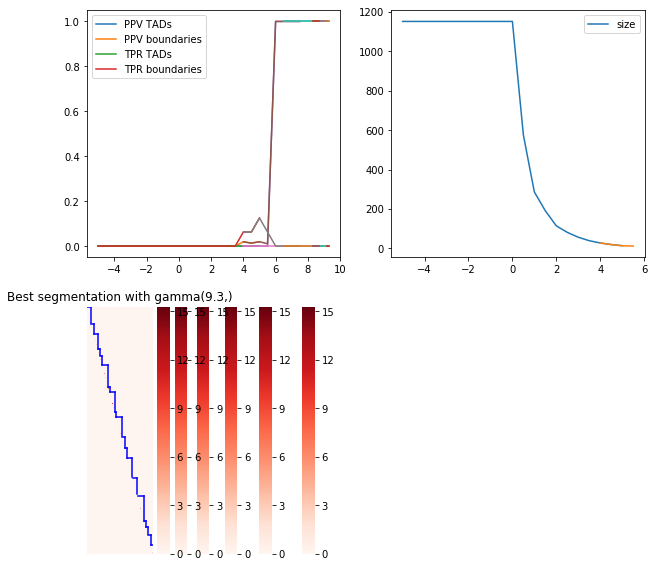

In [9]:
lavasim.bestparams()

INFO:TADcalling:NaNs filling with 0.00
INFO:TADcalling:Removing 1 first diagonals
INFO:TADcalling:Percentile filtering of input mtx, min percentile: 1.000000 (0.000), max percentile: 99.000000 (0.025)
INFO:TADcalling:Log-transform of input mtx, base: 2
INFO:TADcalling:Subtracting minimum from mtx
new range is:
gamma    [4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5]
dtype: object
best gamma value is: (5.0,)
function used for optimisation is: 0


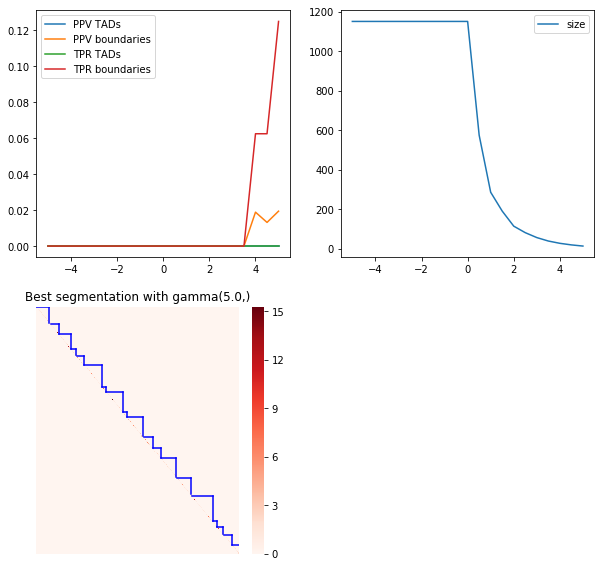

In [35]:
lavasim.call(mode='primary')

INFO:TADcalling:NaNs filling with 0.00
INFO:TADcalling:Removing 1 first diagonals
INFO:TADcalling:Percentile filtering of input mtx, min percentile: 1.000000 (0.000), max percentile: 99.000000 (0.025)
INFO:TADcalling:Log-transform of input mtx, base: 2
INFO:TADcalling:Subtracting minimum from mtx
INFO:TADcalling:NaNs filling with 0.00
INFO:TADcalling:Removing 1 first diagonals
INFO:TADcalling:Percentile filtering of input mtx, min percentile: 1.000000 (0.000), max percentile: 99.000000 (0.025)
INFO:TADcalling:Log-transform of input mtx, base: 2
INFO:TADcalling:Subtracting minimum from mtx
new range is:
gamma    [4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5]
dtype: object
best gamma value is: (5.0,)
function used for optimisation is: 0


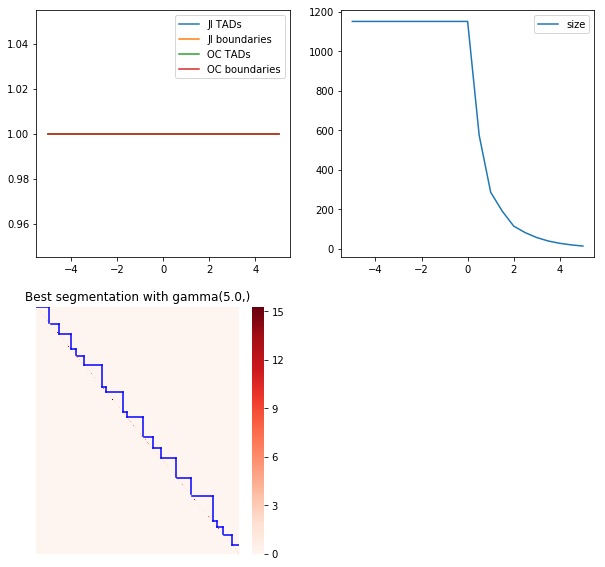

In [36]:
lavaconv.call(mode='primary')

/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice


/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice


/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice


/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice


/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice


/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice


/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice


new range is:
window    [-80000, -60000, -40000, -20000, 0, 20000, 400...
cutoff    [0.0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14,...
dtype: object
best gamma value is: (20000, 0.2)
function used for optimisation is: 0


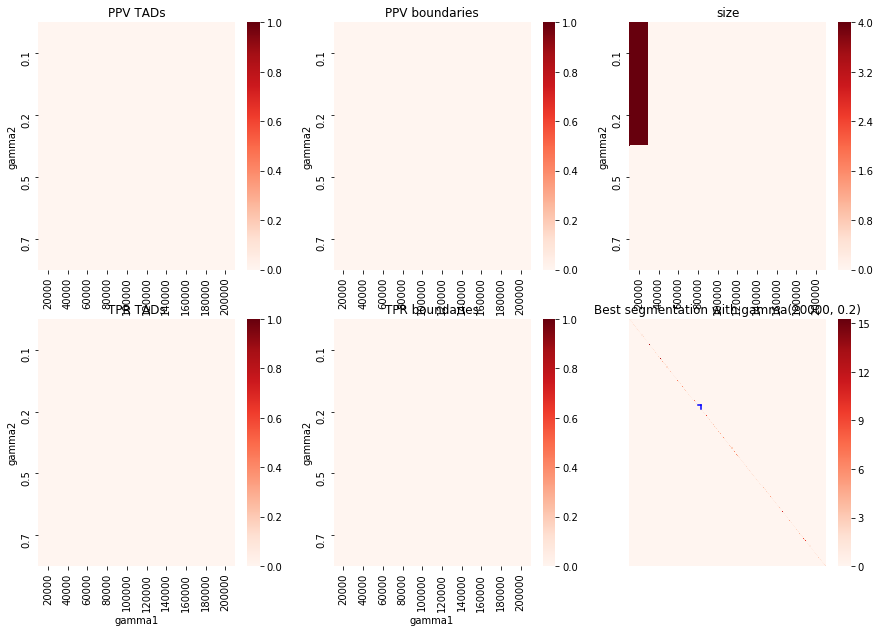

In [37]:
inssim.call(mode='primary')

/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice


/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice


/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice


/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice


/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice


/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice


/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice


/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice


/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice


/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice


/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice


/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice


/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice


/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice


new range is:
window    [-80000, -60000, -40000, -20000, 0, 20000, 400...
cutoff    [0.0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14,...
dtype: object
best gamma value is: (20000, 0.2)
function used for optimisation is: 0


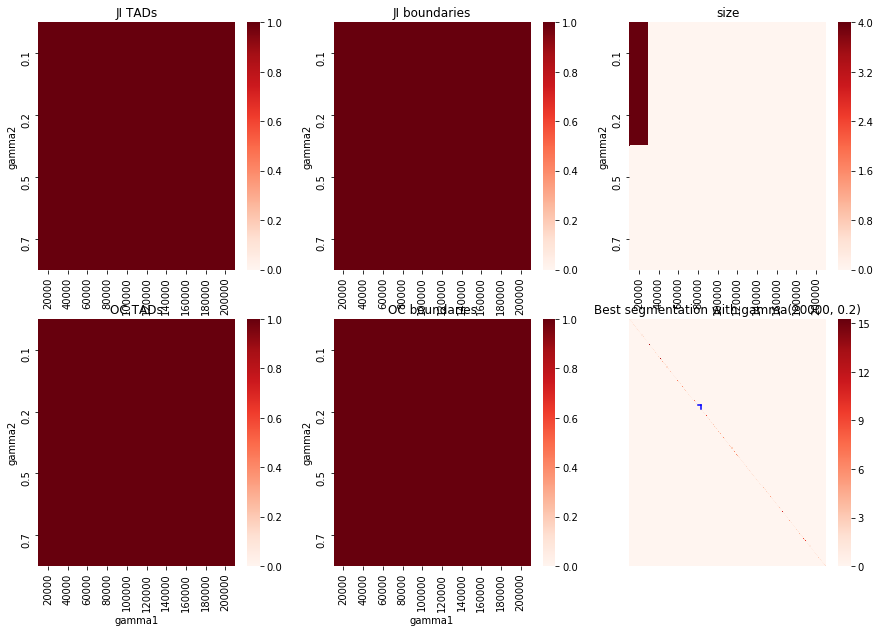

In [38]:
insconv.call(mode='primary')

In [27]:
insconv.history['ranges'][0][0]

array([ 20000,  40000,  60000,  80000, 100000, 120000, 140000, 160000,
       180000, 200000])